In [1]:
import pandas as pd
import yfinance as yf
stk_data = yf.download("RELIANCE.NS", start="2021-06-01", end="2022-05-01")
print(stk_data.head())

C:\Users\tiruk\AppData\Local\Temp\ipykernel_21700\620575181.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stk_data = yf.download("RELIANCE.NS", start="2021-06-01", end="2022-05-01")
[*********************100%***********************]  1 of 1 completed

Price             Close         High         Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                     
2021-06-01   987.374939  1002.443448  977.177463   986.054707    28013832
2021-06-02  1002.101929  1005.857676  981.957442   981.957442    24630162
2021-06-03  1005.925964  1024.294990  999.757459  1011.092917    23974257
2021-06-04   997.208069  1009.021575  994.362780  1008.270425    14468646
2021-06-07  1014.006409  1020.652962  994.704167  1002.443306    16336573


In [2]:
import pandas as pd
# Flatten column MultiIndex if exists
if isinstance(stk_data.columns, pd.MultiIndex):
    stk_data.columns = [col[0] for col in stk_data.columns]

# Check data
print("Data fetched successfully!")
print(stk_data.head())

Data fetched successfully!
                  Close         High         Low         Open    Volume
Date                                                                   
2021-06-01   987.374939  1002.443448  977.177463   986.054707  28013832
2021-06-02  1002.101929  1005.857676  981.957442   981.957442  24630162
2021-06-03  1005.925964  1024.294990  999.757459  1011.092917  23974257
2021-06-04   997.208069  1009.021575  994.362780  1008.270425  14468646
2021-06-07  1014.006409  1020.652962  994.704167  1002.443306  16336573


In [3]:
stk_data=stk_data[["Open","High","Low","Close"]]
stk_data

,Open,High,Low,Close
Date,,,,
2021-06-01,986.054707,1002.443448,977.177463,987.374939
2021-06-02,981.957442,1005.857676,981.957442,1002.101929
2021-06-03,1011.092917,1024.294990,999.757459,1005.925964
2021-06-04,1008.270425,1009.021575,994.362780,997.208069
2021-06-07,1002.443306,1020.652962,994.704167,1014.006409
...,...,...,...,...
2022-04-25,1252.808769,1260.117952,1216.833432,1231.155029
2022-04-26,1238.007307,1276.837847,1236.956647,1267.998169
2022-04-27,1258.952988,1291.913249,1258.587463,1269.231689


In [4]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["Close"]])
print("Len:",data1.shape)

Len: (228, 1)


In [5]:
orders=[(0,0,0),(0,0,1),(2,0,1),(1,1,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    model = SARIMAX(data1, order=i, seasonal_order=(0,0,0,12))
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)
    

RMSE-Testset: 0.5082558287959452
maPe-Testset: 0.9956140350877193
RMSE-Testset: 0.274704463010731
maPe-Testset: 488447477679.6438


C:\Anaconda3\envs\dineshML\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda3\envs\dineshML\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


RMSE-Testset: 0.05035477983835918
maPe-Testset: 437391199409.67413
RMSE-Testset: 0.05031214168555982
maPe-Testset: 467602041398.693


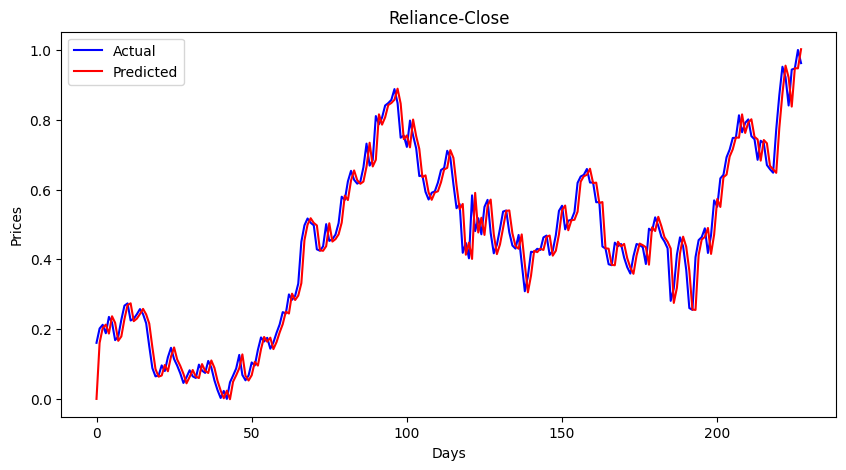

In [6]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","Reliance-Close","Days","Prices")

In [7]:
len(data1)

228

In [8]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [9]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

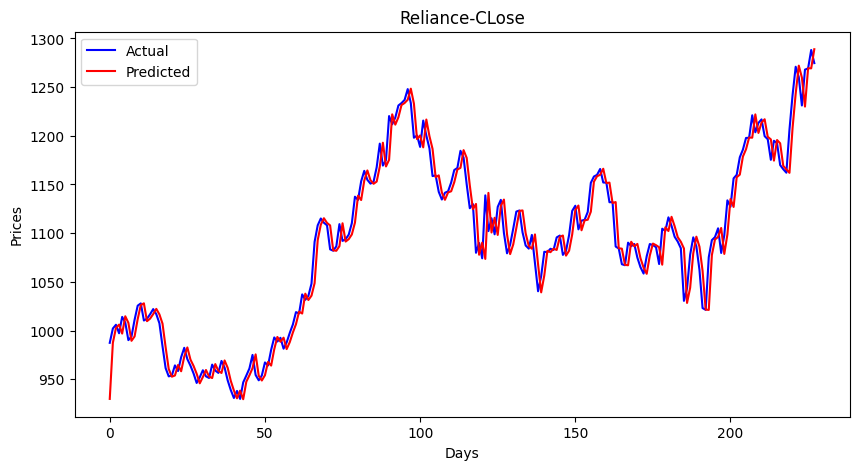

In [10]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Reliance-CLose","Days","Prices")

In [11]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 18.032149181277045
maPe-Testset: 0.012471986854423413


In [12]:
forecast=model_fit.predict(len(data1), len(data1)+1)

In [13]:
forecast

array([0.96079353, 0.96073665])

In [14]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [15]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [16]:
forecast_stock_price_test_oriF

,Closefore
0,1274.138369
1,1274.117985


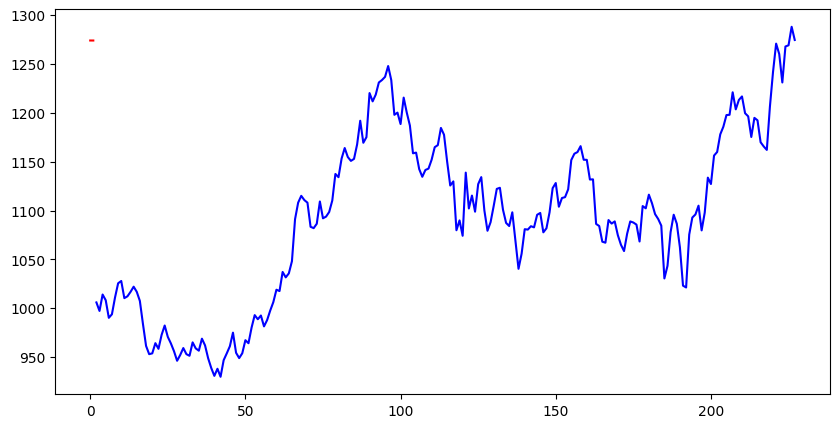

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[2:2225], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")